# Data Ingestion:
Importing the required libraries such as pandas, numpy, matplotlib, seaborn, etc.

Loading the Data.

Loading the Time Series Data into a pandas dataframe.

Checking the datatype of the index and convert it to datetime if necessary.

Setting the datetime column as the index of the dataframe.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
data=pd.read_csv("TSLA.csv")

In [3]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [4]:
stock_data=data[["Date","Close"]]

In [5]:
stock_data.head()

,Date,Close
0,2010-06-29,23.889999
1,2010-06-30,23.830000
2,2010-07-01,21.959999
3,2010-07-02,19.200001
4,2010-07-06,16.110001


In [6]:
stock_data.shape

(2416, 2)

In [7]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2416 non-null   object 
 1   Close   2416 non-null   float64
dtypes: float64(1), object(1)
memory usage: 37.9+ KB


In [8]:
stock_data=stock_data.set_index("Date")

In [9]:
stock_data

,Close
Date,
2010-06-29,23.889999
2010-06-30,23.830000
2010-07-01,21.959999
2010-07-02,19.200001
2010-07-06,16.110001
...,...
2020-01-28,566.900024
2020-01-29,580.989990
2020-01-30,640.809998


# I am converting date column as a index column
1. I can easily retrive the data
2. Visulization is also simple

# EDA(exploratory data analysis)
1. Summary Statistics

2. Visualizing the Time Series Data

3. Stationarity Check

4. Check for Autocorrelation

5. Outlier Detection

In [10]:
stock_data.describe()

,Close
count,2416.000000
mean,186.403651
std,119.136020
min,15.800000
25%,34.400002
50%,212.960007
75%,266.774994
max,780.000000


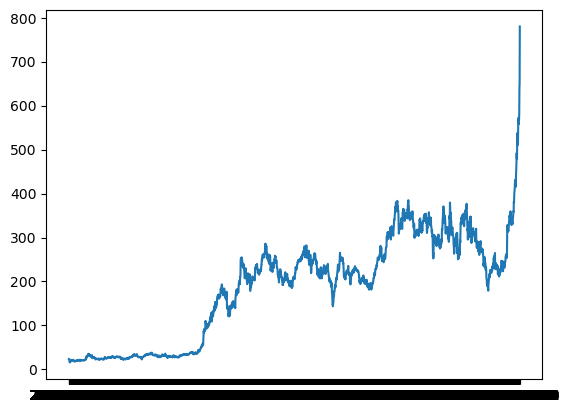

In [11]:
import numpy as np
import matplotlib.pyplot as plt
plt.plot(stock_data.Close)

(array([729., 142., 720., 520., 275.,  12.,   9.,   6.,   2.,   1.]),
 array([ 15.8 ,  92.22, 168.64, 245.06, 321.48, 397.9 , 474.32, 550.74,
        627.16, 703.58, 780.  ]),
 <BarContainer object of 10 artists>)

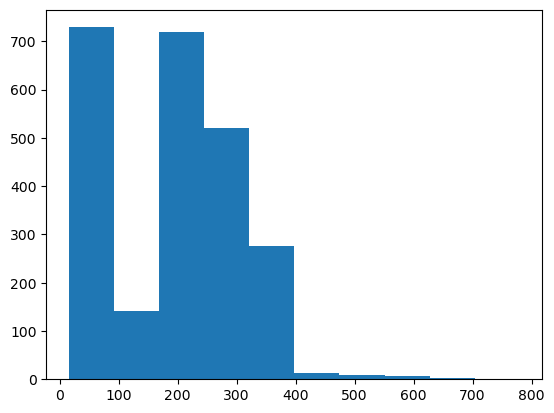

In [12]:
plt.hist(stock_data.Close)

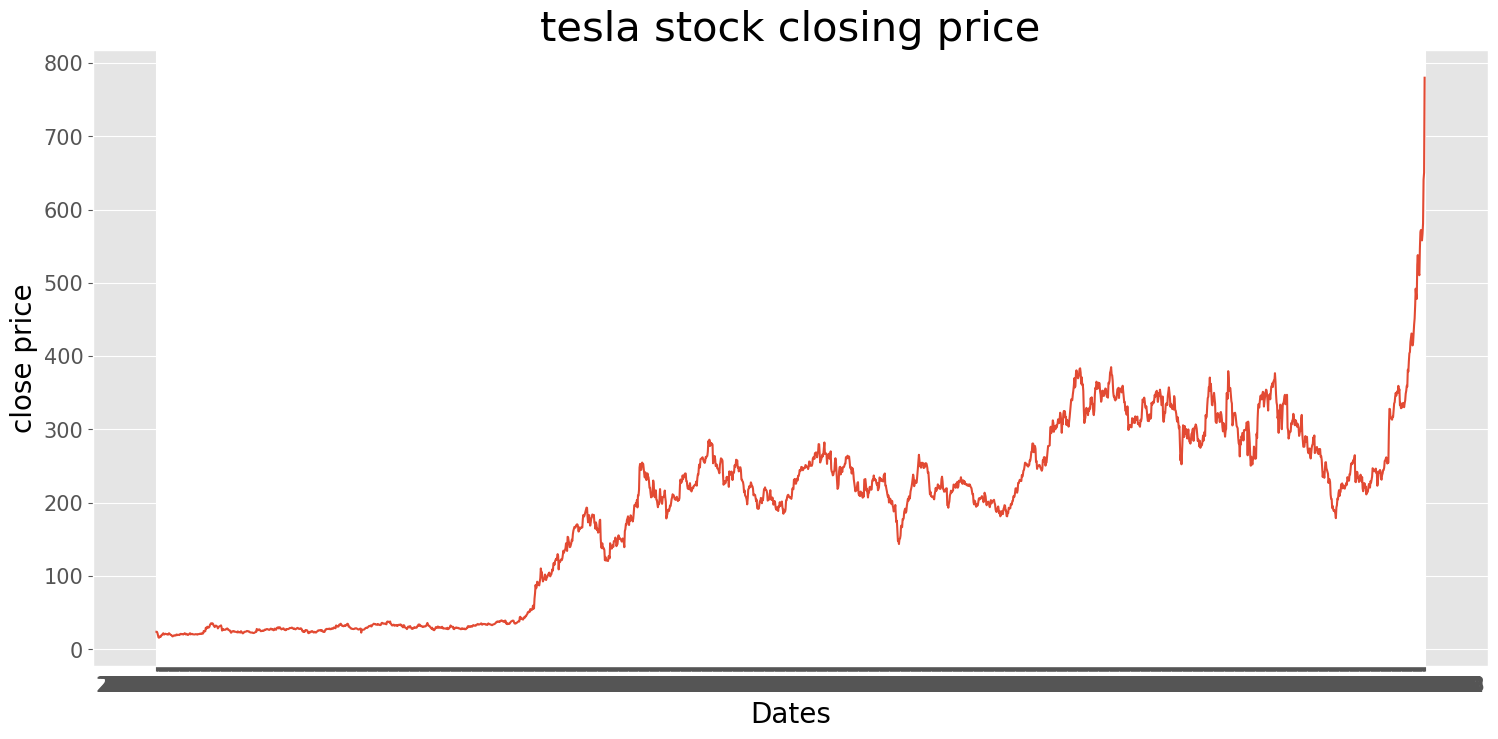

In [13]:
plt.style.use('ggplot')
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel("Dates",fontsize=20)
plt.xticks(fontsize=15)
plt.ylabel("close price",fontsize=20)
plt.yticks(fontsize = 15) 
plt.plot(stock_data["Close"])
plt.title("tesla stock closing price",fontsize=30)
plt.show()

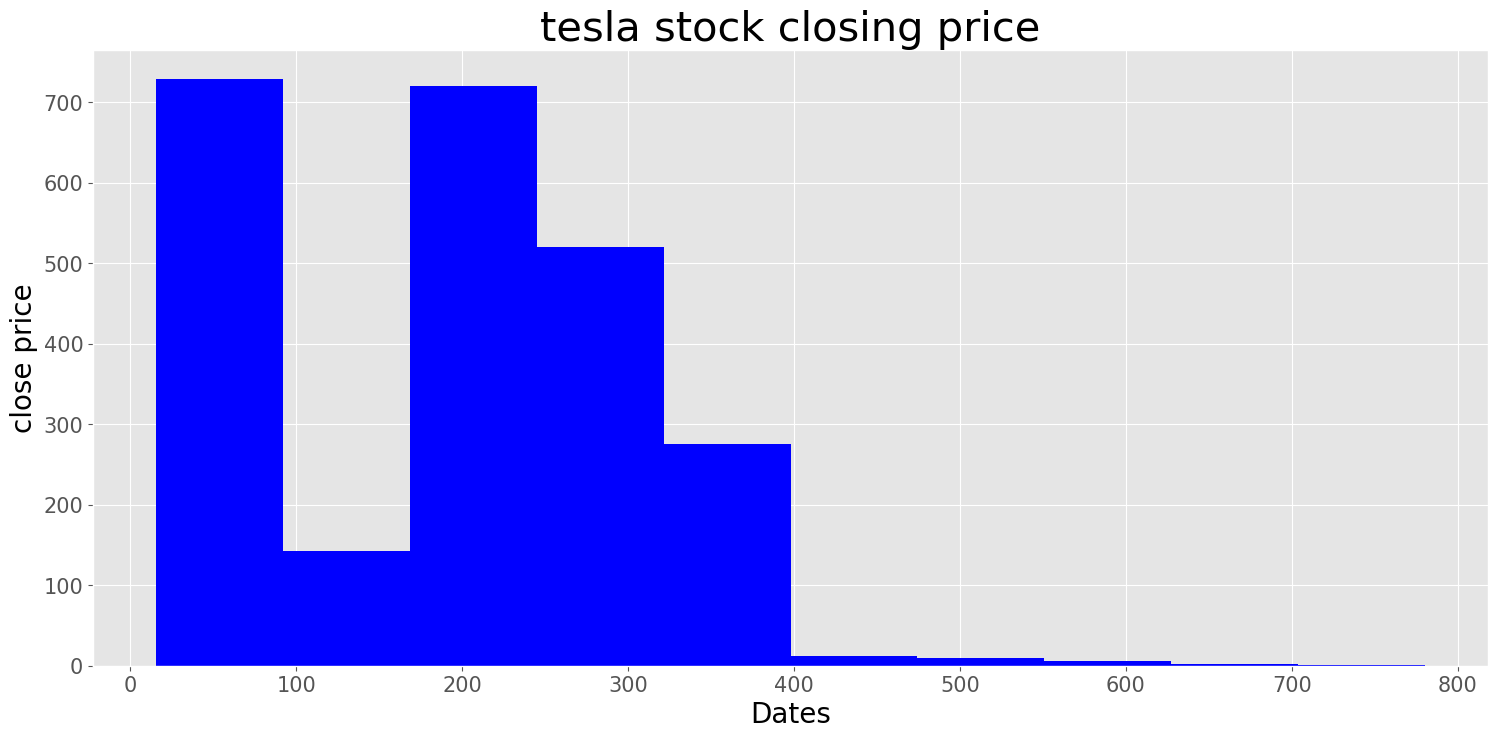

In [14]:
plt.style.use('ggplot')
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel("Dates",fontsize=20)
plt.xticks(fontsize=15)
plt.ylabel("close price",fontsize=20)
plt.yticks(fontsize = 15) 
plt.hist(stock_data['Close'], linewidth = 3, color = 'blue')
plt.title("tesla stock closing price",fontsize=30)
plt.show()

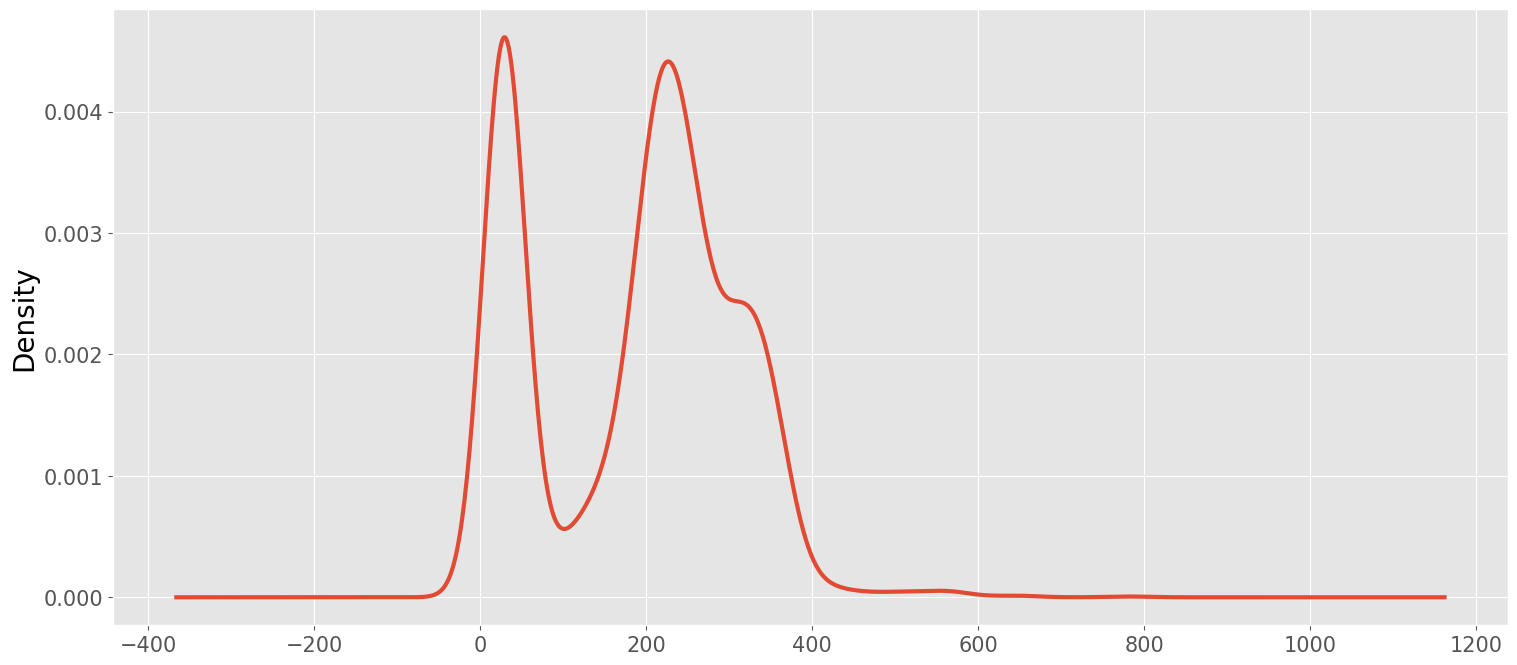

In [15]:
df_close = stock_data['Close'] 
df_close.plot(kind='kde',figsize = (18,8), linewidth= 3) 
plt.xticks(fontsize = 15)
plt.grid("both")
plt.ylabel('Density', fontsize = 20)
plt.yticks(fontsize = 15)
plt.show()

In [16]:
rolmean=stock_data["Close"].rolling(365).mean()

In [17]:
stock_data["Close"].rolling(3).std()

Date
2010-06-29          NaN
2010-06-30          NaN
2010-07-01     1.097376
2010-07-02     2.329212
2010-07-06     2.926550
                ...    
2020-01-28     4.644365
2020-01-29    11.583042
2020-01-30    39.242079
2020-01-31    37.671983
2020-02-03    77.697316
Name: Close, Length: 2416, dtype: float64

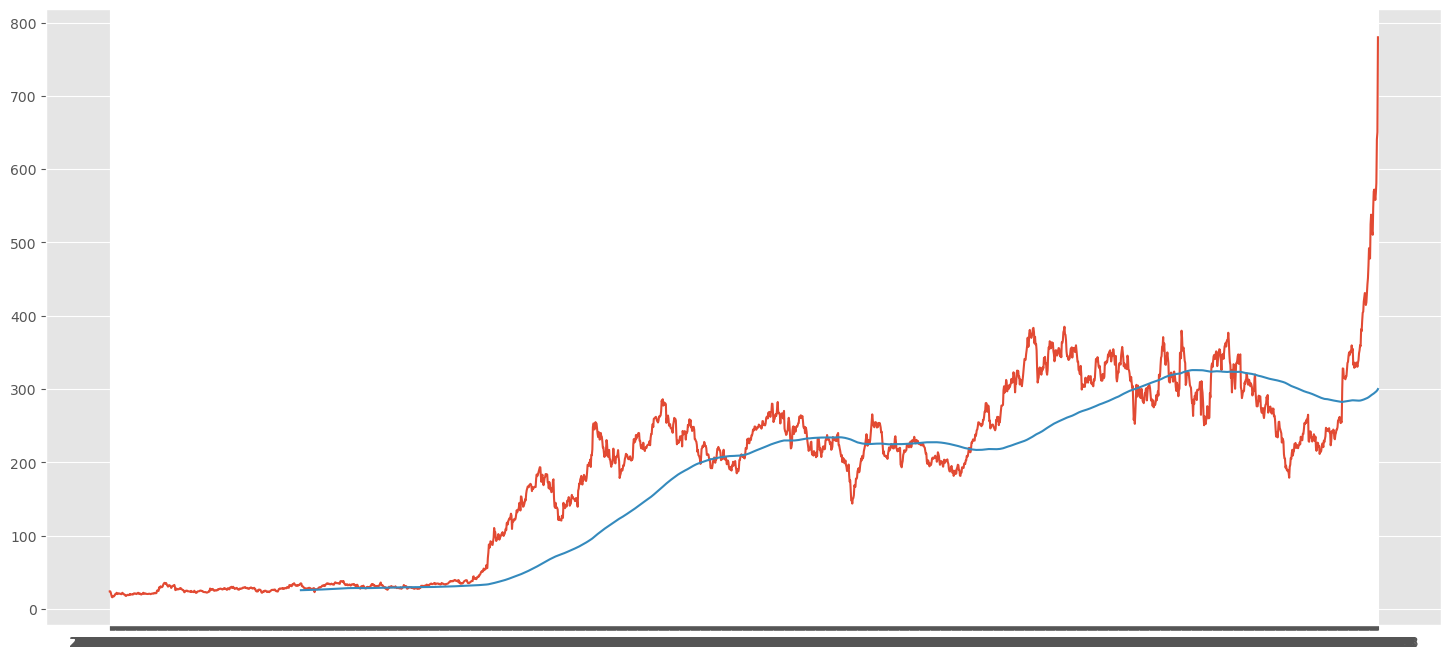

In [18]:
plt.figure(figsize=(18,8))
plt.plot(stock_data.Close)
plt.plot(rolmean)
plt.show()

In [19]:
from statsmodels.tsa.stattools import adfuller
adft=adfuller(stock_data["Close"])

In [20]:
adft

(1.4000685020861607,
 0.9971144530803391,
 18,
 2397,
 {'1%': -3.4330810457844425,
  '5%': -2.862746538733181,
  '10%': -2.567412291147901},
 16128.395638116252)

In [21]:
pd.Series(adft[0:4],index=["test stats","p-value","lag","data point"])

test stats       1.400069
p-value          0.997114
lag             18.000000
data point    2397.000000
dtype: float64

In [22]:
#Test for staionarity
def test_stationarity(timeseries):
    # Determing rolling statistics
    rolmean = timeseries.rolling(48).mean() # rolling mean
    rolstd = timeseries.rolling(48).std() # rolling standard deviation
    # Plot rolling statistics:
    plt.figure(figsize = (18,8))
    plt.grid('both')
    plt.plot(timeseries, color='blue',label='Original', linewidth = 3)
    plt.plot(rolmean, color='red', label='Rolling Mean',linewidth = 3)
    plt.plot(rolstd, color='black', label = 'Rolling Std',linewidth = 4)
    plt.legend(loc='best', fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
    plt.title('Rolling Mean and Standard Deviation', fontsize = 25)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    # hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)

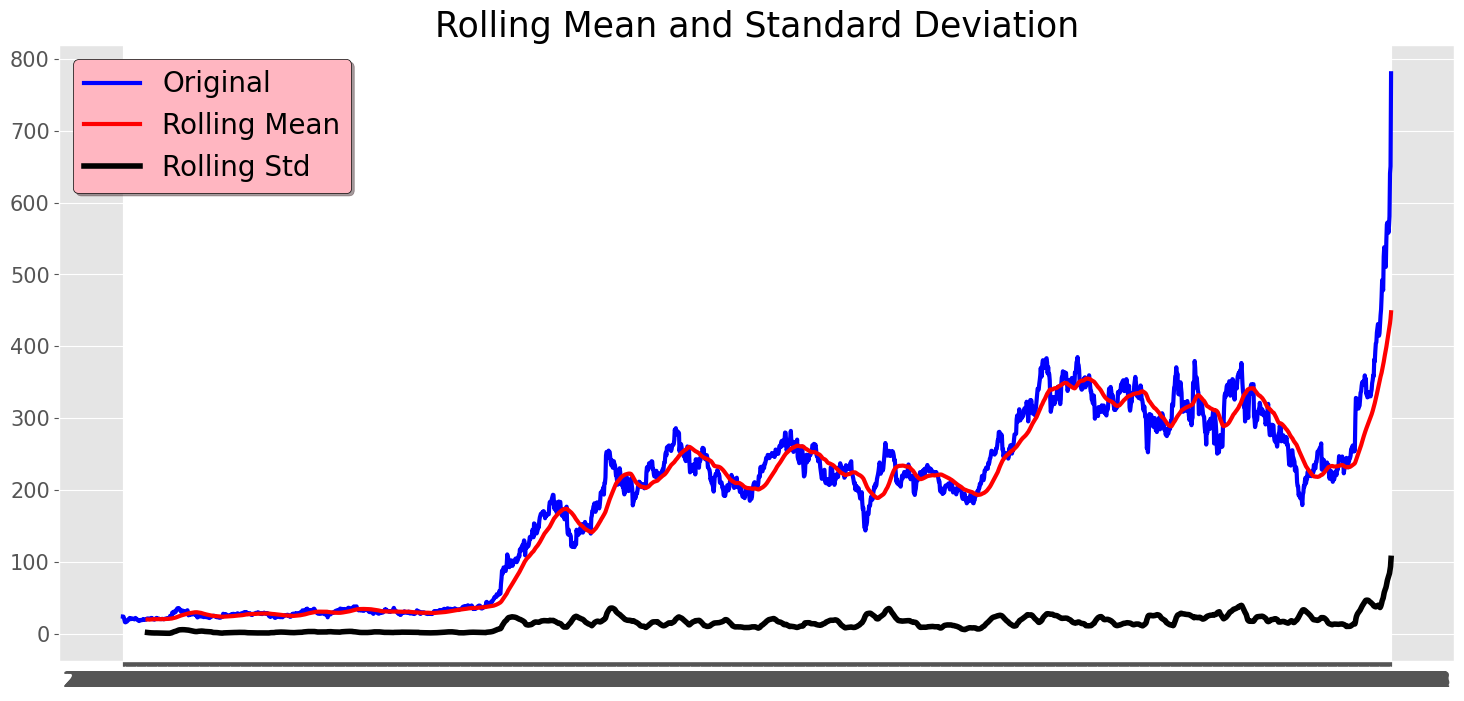

Results of dickey fuller test
Test Statistics                   1.400069
p-value                           0.997114
No. of lags used                 18.000000
Number of observations used    2397.000000
critical value (1%)              -3.433081
critical value (5%)              -2.862747
critical value (10%)             -2.567412
dtype: float64


In [23]:
test_stationarity(stock_data.Close)

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(stock_data["Close"],model= "multiplicative",period=30)

<Figure size 2000x1000 with 0 Axes>

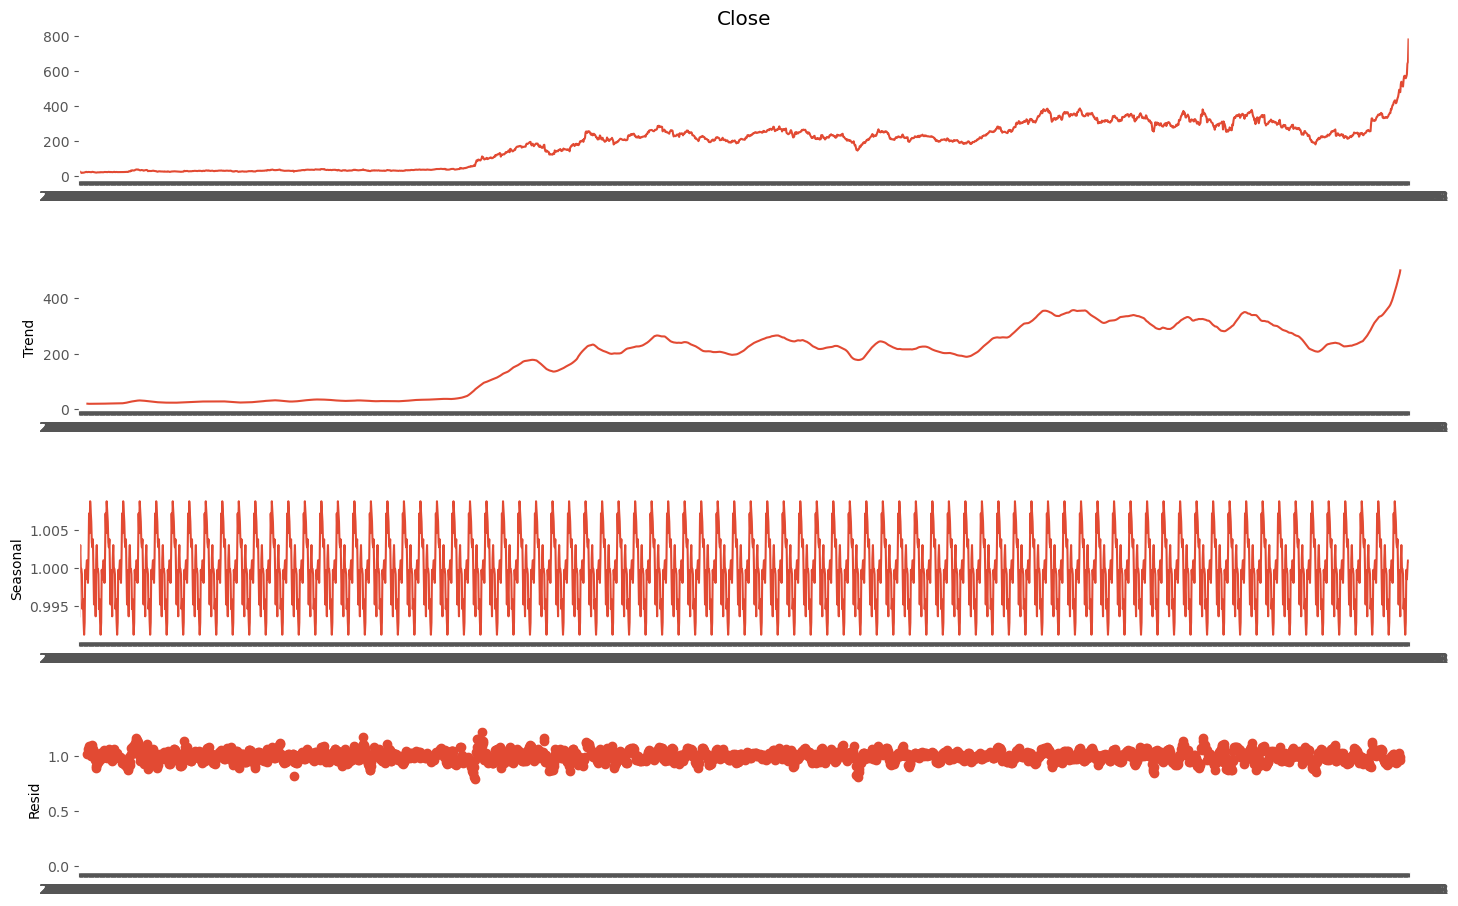

In [25]:
plt.figure(figsize=(20,10))
fig=result.plot()
fig.set_size_inches(17,10)

In [26]:
result.seasonal

Date
2010-06-29    0.993679
2010-06-30    1.001199
2010-07-01    1.003070
2010-07-02    0.999954
2010-07-06    0.999935
                ...   
2020-01-28    0.999806
2020-01-29    0.998551
2020-01-30    0.999889
2020-01-31    1.001062
2020-02-03    1.000970
Name: seasonal, Length: 2416, dtype: float64

In [27]:
result.resid

Date
2010-06-29   NaN
2010-06-30   NaN
2010-07-01   NaN
2010-07-02   NaN
2010-07-06   NaN
              ..
2020-01-28   NaN
2020-01-29   NaN
2020-01-30   NaN
2020-01-31   NaN
2020-02-03   NaN
Name: resid, Length: 2416, dtype: float64

In [28]:
result.trend

Date
2010-06-29   NaN
2010-06-30   NaN
2010-07-01   NaN
2010-07-02   NaN
2010-07-06   NaN
              ..
2020-01-28   NaN
2020-01-29   NaN
2020-01-30   NaN
2020-01-31   NaN
2020-02-03   NaN
Name: trend, Length: 2416, dtype: float64

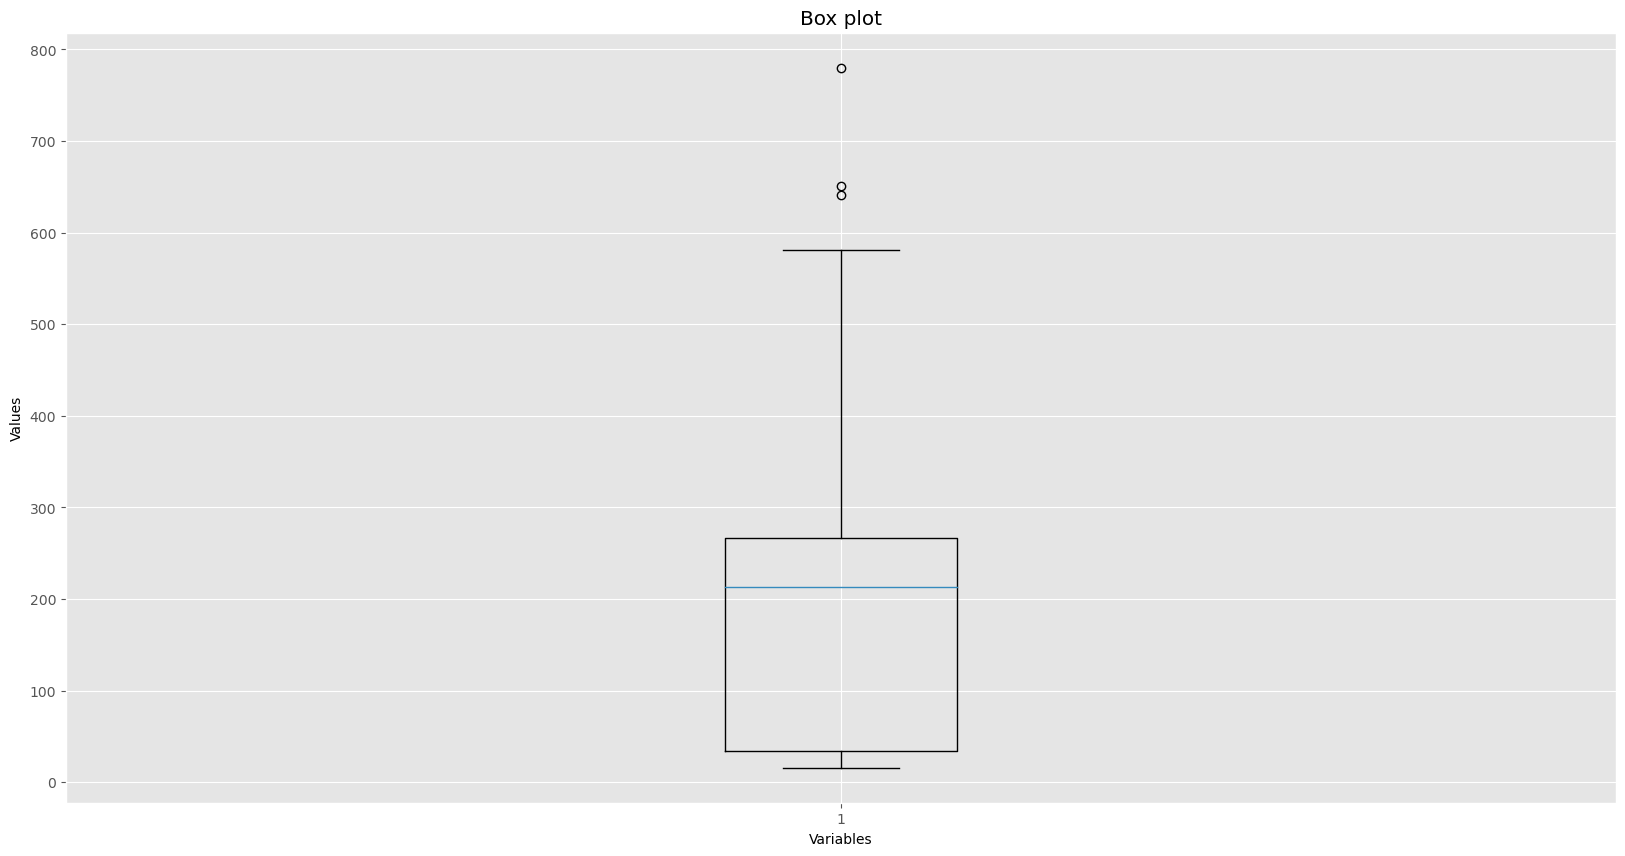

In [29]:
fig, ax = plt.subplots(figsize=(20, 10))
# Plot the box plot
ax.boxplot(stock_data["Close"])
# Set the x-axis label
ax.set_xlabel('Variables')
# Set the y-axis label
ax.set_ylabel('Values')
# Set the title
ax.set_title('Box plot')
# Show the plot
plt.show()

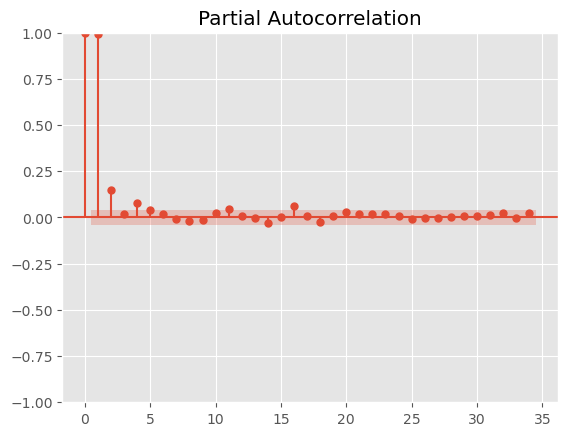

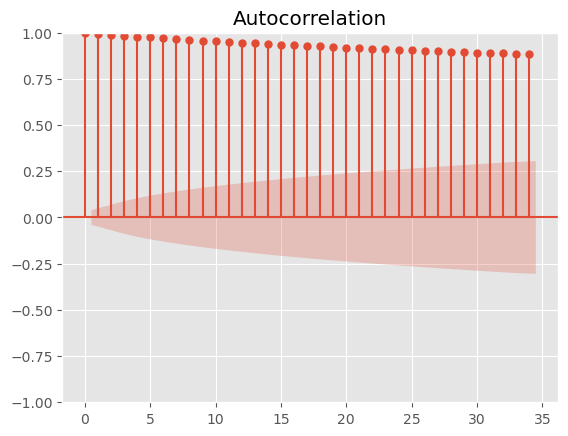

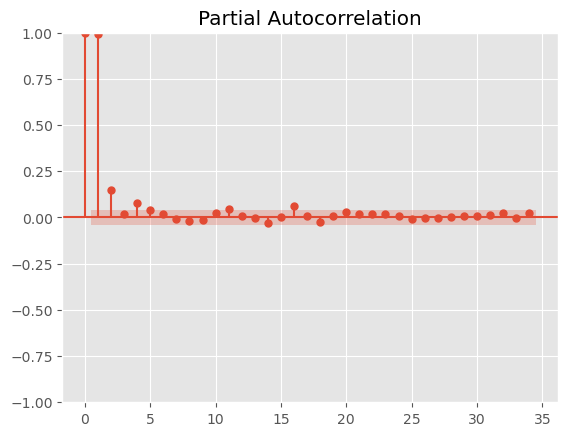

In [30]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(stock_data.Close)
plot_pacf(stock_data.Close)

# Preprocessing of the data

1. If any then filling the missing data(here not required)

2. Converting data into the stationary time series

3. If necessary then normalizing the data(here not required)

4. Split the data into train and test

5. Clean the data by removing the outlier(here not required)

In [31]:
df_close=stock_data["Close"]

In [32]:
tsla_close_diff_1=df_close.diff()

In [33]:
tsla_close_diff_1=tsla_close_diff_1.dropna()

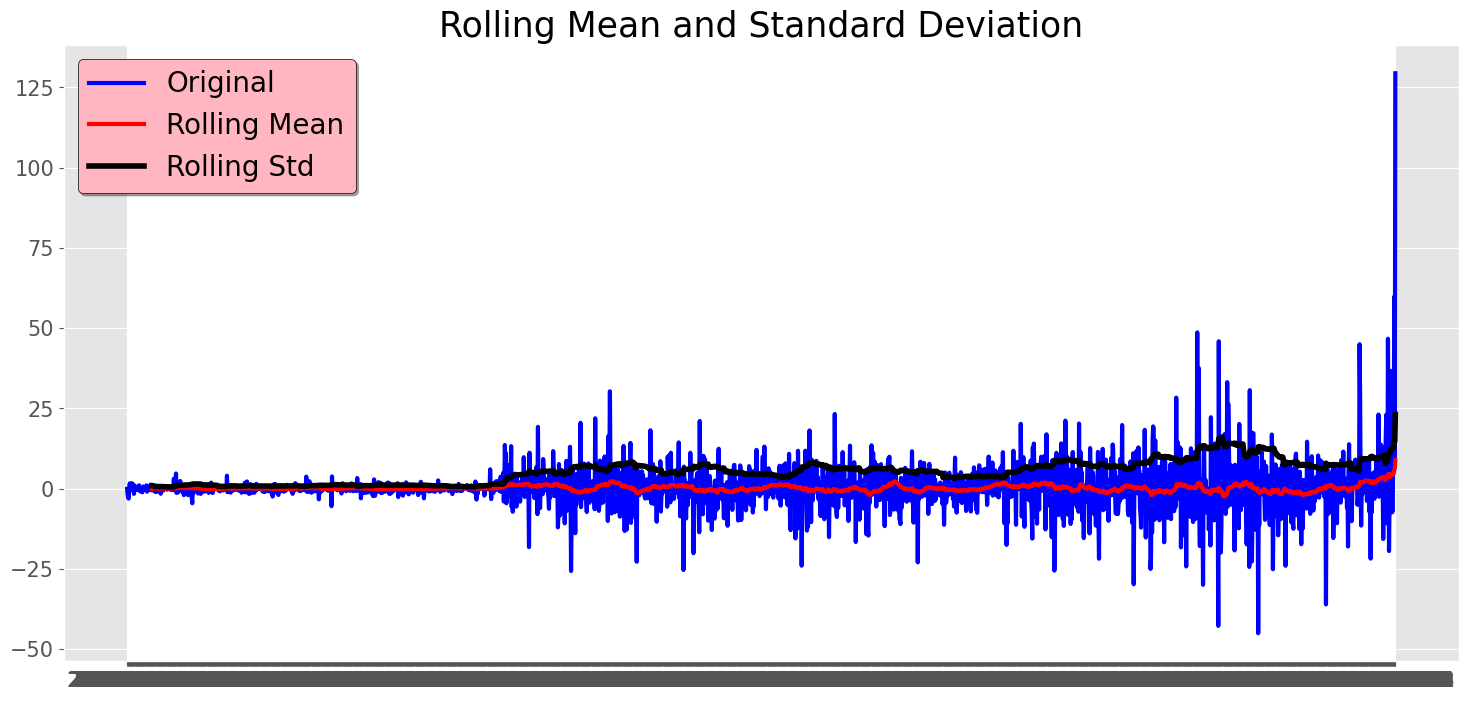

Results of dickey fuller test
Test Statistics               -6.151177e+00
p-value                        7.555858e-08
No. of lags used               1.700000e+01
Number of observations used    2.397000e+03
critical value (1%)           -3.433081e+00
critical value (5%)           -2.862747e+00
critical value (10%)          -2.567412e+00
dtype: float64


In [34]:
test_stationarity(tsla_close_diff_1)

In [35]:
df_close.diff(2)

Date
2010-06-29           NaN
2010-06-30           NaN
2010-07-01     -1.930000
2010-07-02     -4.629999
2010-07-06     -5.849998
                 ...    
2020-01-28      2.080017
2020-01-29     22.969970
2020-01-30     73.909974
2020-01-31     69.580017
2020-02-03    139.190002
Name: Close, Length: 2416, dtype: float64

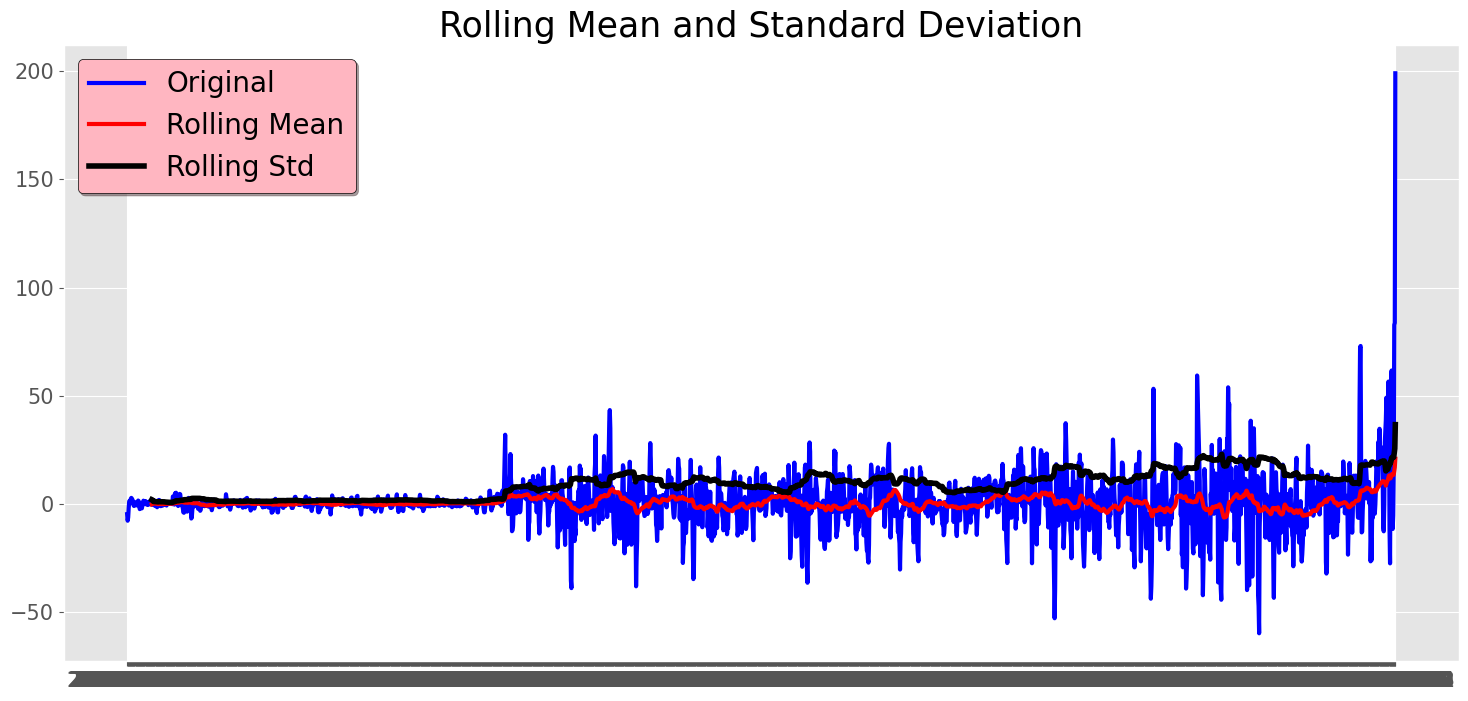

Results of dickey fuller test
Test Statistics                  -3.145422
p-value                           0.023369
No. of lags used                 27.000000
Number of observations used    2385.000000
critical value (1%)              -3.433095
critical value (5%)              -2.862753
critical value (10%)             -2.567416
dtype: float64


In [36]:
tsla_close_diff_3=df_close.diff(3)
tsla_close_diff_3=tsla_close_diff_3.dropna()
test_stationarity(tsla_close_diff_3)

In [37]:
train_data=df_close[0:-60]
test_data=df_close[-60:]

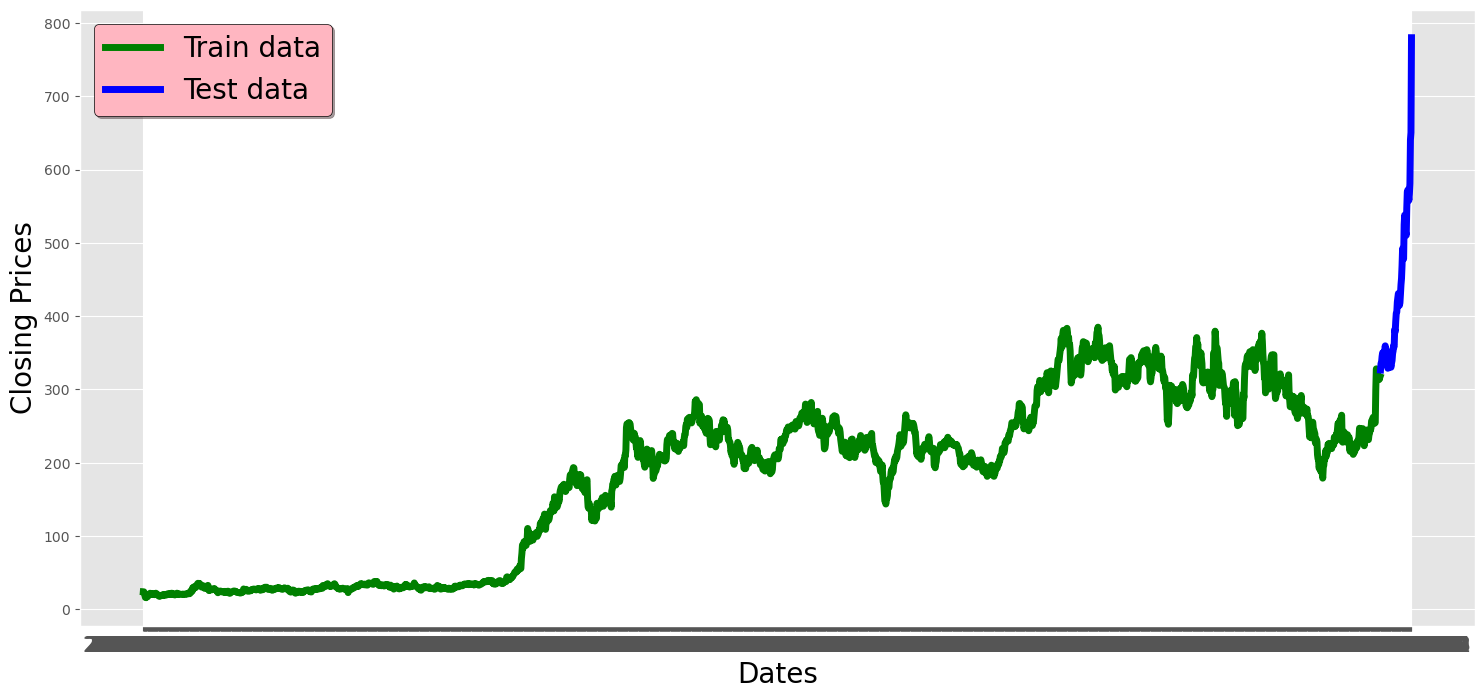

In [38]:
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates', fontsize = 20)
plt.ylabel('Closing Prices', fontsize = 20)
plt.xticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.plot(train_data, 'green', label='Train data', linewidth = 5)
plt.plot(test_data, 'blue', label='Test data', linewidth = 5)
plt.legend(fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')

# Model Building and Evaluation

In [42]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [43]:
history=[x for x in train_data]

In [44]:
model=ARIMA(history,order=(1,1,1))

In [45]:
model=model.fit()

In [46]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2356
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -7648.458
Date:                Sun, 07 Apr 2024   AIC                          15302.916
Time:                        17:19:18   BIC                          15320.208
Sample:                             0   HQIC                         15309.213
                               - 2356                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8907      0.128     -6.958      0.000      -1.142      -0.640
ma.L1          0.8807      0.133      6.643      0.000       0.621       1.141
sigma2        38.7670      0.465     83.286      0.000      37.855      39.679
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):              9765.88
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):              20.79   Skew:                             0.16
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [47]:
model.forecast()

array([317.17111281])

In [48]:
test_data[0]

326.579987

In [50]:
def train_arima_model(X, y, arima_order):
    # prepare training dataset
    # make predictions list
    history = [x for x in X]
    predictions = list()
    for t in range(len(y)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(y[t])
    # calculate out of sample error
    rmse = np.sqrt(mean_squared_error(y, predictions))
    return rmse

In [51]:
# evaluate different combinations of p, d and q values for an ARIMA model to get the best order for ARIMA Model
def evaluate_models(dataset, test, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = train_arima_model(dataset, test, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [52]:
import warnings
warnings.filterwarnings('ignore')
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)
evaluate_models(train_data, test_data, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=264.077
ARIMA(0, 0, 1) RMSE=141.173
ARIMA(0, 0, 2) RMSE=85.720
ARIMA(0, 1, 0) RMSE=22.126
ARIMA(0, 1, 1) RMSE=22.088
ARIMA(0, 1, 2) RMSE=22.077
ARIMA(0, 2, 0) RMSE=23.390
ARIMA(0, 2, 1) RMSE=21.577
ARIMA(0, 2, 2) RMSE=21.583
ARIMA(1, 0, 0) RMSE=22.183
ARIMA(1, 0, 1) RMSE=22.149
ARIMA(1, 0, 2) RMSE=22.139
ARIMA(1, 1, 0) RMSE=22.084
ARIMA(1, 1, 1) RMSE=22.102
ARIMA(1, 1, 2) RMSE=22.095
ARIMA(1, 2, 0) RMSE=20.416
ARIMA(1, 2, 1) RMSE=21.587
ARIMA(1, 2, 2) RMSE=21.573
ARIMA(2, 0, 0) RMSE=22.143
ARIMA(2, 0, 1) RMSE=22.224
ARIMA(2, 0, 2) RMSE=22.097
ARIMA(2, 1, 0) RMSE=22.083
ARIMA(2, 1, 1) RMSE=22.077
ARIMA(2, 1, 2) RMSE=22.088
ARIMA(2, 2, 0) RMSE=20.575
ARIMA(2, 2, 1) RMSE=21.650
ARIMA(2, 2, 2) RMSE=21.567
Best ARIMA(1, 2, 0) RMSE=20.416
